In [29]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 
iphone_reviews= []

In [30]:
iphone_snapdeal=[]
url1= "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2= "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip= []  
    base_url= url1+str(i)+url2
    response= requests.get(base_url)
    soup= bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        iphone_snapdeal= iphone_snapdeal+ip

In [31]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [32]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [33]:
iphone_snapdeal

['lovely  fastest super',
 'Good Mobile but its memory will be filled faster its just 8GB limit',
 "Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal's service. 100% satisfactory. Genuine product with honest service. So don't believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience.",
 'Quality product from snapdeal. Delivery was on time.',
 'I am very much happy with my product thanks to SNEPDEAL.',
 'Marvallous Phone...Ever used....You must buy',
 'The 5C was delivered in a sealed box - crisp and brand new !  super deal.',
 'Good , product is satisfied which I got from Snapdeal',
 'Its an awesome phone',
 'Great product at such amazing price. Delivery was fast. N iPhone is amazing.',
 'Awesome iphone in this price range.\ni would recommend this phone',
 'dream come true',
 'got this at a great di

## Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Importing Data

In [35]:
ip_snapd= pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['lovely fastest super','Good Mobile but its memory will be filled faster its just 8GB limit',"""Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal's service. 100% satisfactory. Genuine product with honest service. So don't believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience.""",'Quality product from snapdeal. Delivery was on time.','I am very much happy with my product thanks to SNEPDEAL.','Marvallous Phone...Ever used....You must buy','The 5C was delivered in a sealed box - crisp and brand new ! super deal.','Good,product is satisfied which I got from Snapdeal','Its an awesome phone',...,"""It's really 100% worth to buy this product. I am fully satisfied with this product.""",'Good Product,Do not hang. Samsung products are pathetic. Used Grand Qauttro which use to take 20-30 seconds to open even contact list.\n\nApple is quality product. Only problem is you need to pay for everything.','Satisfied and will buy more products from Snapdeal','Best phone my iPhone','Worth in this price. Excellent features. Overall performance is Good','genuine product delivered within scheduled timframe. Thanks snapdeal !','Very good service by seller. Faster delivery and proper packing.','Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera,crisp display . The battery issue has been solved with the latest ios9 update .']


In [36]:
ip_snapd= ' '.join(ip_snapd)
ip_snapd

'[\'lovely  fastest super\'  \'Good Mobile but its memory will be filled faster its just 8GB limit\'  "Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal\'s service. 100% satisfactory. Genuine product with honest service. So don\'t believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience."  \'Quality product from snapdeal. Delivery was on time.\'  \'I am very much happy with my product thanks to SNEPDEAL.\'  \'Marvallous Phone...Ever used....You must buy\'  \'The 5C was delivered in a sealed box - crisp and brand new !  super deal.\'  \'Good   product is satisfied which I got from Snapdeal\'  \'Its an awesome phone\'  \'Great product at such amazing price. Delivery was fast. N iPhone is amazing.\'  \'Awesome iphone in this price range.\\ni would recommend this phone\'  \'dream come true\'  \'got thi

In [37]:
# Remove Punctuations 
no_punc_text= ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'lovely  fastest super  Good Mobile but its memory will be filled faster its just 8GB limit  Honestly speaking initially I was hesitated because of previous reviews about snapdeal But those all reviews are fake and just to damage the reputation of snapdeal I am truely satisfied by snapdeals service 100 satisfactory Genuine product with honest service So dont believe on rumours I am going with five stars Thanks snapdeal for wonderful shopping experience  Quality product from snapdeal Delivery was on time  I am very much happy with my product thanks to SNEPDEAL  Marvallous PhoneEver usedYou must buy  The 5C was delivered in a sealed box  crisp and brand new   super deal  Good   product is satisfied which I got from Snapdeal  Its an awesome phone  Great product at such amazing price Delivery was fast N iPhone is amazing  Awesome iphone in this price rangeni would recommend this phone  dream come true  got this at a great discount  the phone is worth it my wife wanted to try an iphone and 

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajinkya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
# remove https or url within text
no_url_text= re.sub(r'http\S+', '', no_punc_text)
no_url_text

'lovely  fastest super  Good Mobile but its memory will be filled faster its just 8GB limit  Honestly speaking initially I was hesitated because of previous reviews about snapdeal But those all reviews are fake and just to damage the reputation of snapdeal I am truely satisfied by snapdeals service 100 satisfactory Genuine product with honest service So dont believe on rumours I am going with five stars Thanks snapdeal for wonderful shopping experience  Quality product from snapdeal Delivery was on time  I am very much happy with my product thanks to SNEPDEAL  Marvallous PhoneEver usedYou must buy  The 5C was delivered in a sealed box  crisp and brand new   super deal  Good   product is satisfied which I got from Snapdeal  Its an awesome phone  Great product at such amazing price Delivery was fast N iPhone is amazing  Awesome iphone in this price rangeni would recommend this phone  dream come true  got this at a great discount  the phone is worth it my wife wanted to try an iphone and 

In [40]:
text_tokens= word_tokenize(no_url_text)
print(text_tokens)

['lovely', 'fastest', 'super', 'Good', 'Mobile', 'but', 'its', 'memory', 'will', 'be', 'filled', 'faster', 'its', 'just', '8GB', 'limit', 'Honestly', 'speaking', 'initially', 'I', 'was', 'hesitated', 'because', 'of', 'previous', 'reviews', 'about', 'snapdeal', 'But', 'those', 'all', 'reviews', 'are', 'fake', 'and', 'just', 'to', 'damage', 'the', 'reputation', 'of', 'snapdeal', 'I', 'am', 'truely', 'satisfied', 'by', 'snapdeals', 'service', '100', 'satisfactory', 'Genuine', 'product', 'with', 'honest', 'service', 'So', 'dont', 'believe', 'on', 'rumours', 'I', 'am', 'going', 'with', 'five', 'stars', 'Thanks', 'snapdeal', 'for', 'wonderful', 'shopping', 'experience', 'Quality', 'product', 'from', 'snapdeal', 'Delivery', 'was', 'on', 'time', 'I', 'am', 'very', 'much', 'happy', 'with', 'my', 'product', 'thanks', 'to', 'SNEPDEAL', 'Marvallous', 'PhoneEver', 'usedYou', 'must', 'buy', 'The', '5C', 'was', 'delivered', 'in', 'a', 'sealed', 'box', 'crisp', 'and', 'brand', 'new', 'super', 'deal', 

In [41]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ajinkya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajinkya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Tokens count
len(text_tokens)

1573

In [43]:
# Remove Stopwords
my_stop_words= stopwords.words('english')

sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['lovely', 'fastest', 'super', 'Good', 'Mobile', 'memory', 'filled', 'faster', '8GB', 'limit', 'Honestly', 'speaking', 'initially', 'hesitated', 'previous', 'reviews', 'snapdeal', 'But', 'reviews', 'fake', 'damage', 'reputation', 'snapdeal', 'truely', 'satisfied', 'snapdeals', 'service', '100', 'satisfactory', 'Genuine', 'product', 'honest', 'service', 'So', 'dont', 'believe', 'rumours', 'going', 'five', 'stars', 'Thanks', 'snapdeal', 'wonderful', 'shopping', 'experience', 'Quality', 'product', 'snapdeal', 'Delivery', 'time', 'much', 'happy', 'product', 'thanks', 'SNEPDEAL', 'Marvallous', 'PhoneEver', 'usedYou', 'must', 'buy', 'The', '5C', 'delivered', 'sealed', 'box', 'crisp', 'brand', 'new', 'super', 'deal', 'Good', 'product', 'satisfied', 'got', 'Snapdeal', 'Its', 'awesome', 'phone', 'Great', 'product', 'amazing', 'price', 'Delivery', 'fast', 'N', 'iPhone', 'amazing', 'Awesome', 'iphone', 'price', 'rangeni', 'would', 'recommend', 'phone', 'dream', 'come', 'true', 'got', 'great', 'di

In [44]:
# Normalize the data
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['phone', 'worth', 'wife', 'wanted', 'try', 'iphone', 'loving', 'awesome', 'mobile', 'working', 'smooth', 'like', 'apple', 'iphone', 'hahahaha', 'cool', 'a', 'mush', 'deal', 'this', 'great', 'experience', 'iphone', 'snapdeal', 'delivery', 'expectation', 'happy', 'iphone', 'ordering', 'phone', 'little', 'doubt', 'but', 'receiving', 'phone', 'really', 'happyalso', 'found', 'original', 'iphoneearlier', 'doubted', 'good', 'price', 'great', 'seller', 'genuine', 'product', 'fast', 'shipping', 'recommended', 'awsme', 'delivry', 'time', 'product', 'recievd', 'good', 'condition', 'think', 'awsme', 'site', 'shoping', 'excellent', 'product', 'can', 'recommended', 'friends', 'family', 'members', 'service', 'quality', 'good', 'level', 'interactions', 'good', 'totaly', 'satisfy', 'product', 'it', 'brand', 'new', '100', 'genuine', 'iphone', 'and', 'got', 'within', '24', 'hours', 'ordering', 'packing', 'superb', 'priority', 'mark', 'box', 'thanx', 'snapdeal', 'very', 'good', 'phone', 'price']


In [46]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_words))
print(doc)

lovely fastest super good mobile memory filled faster 8gb limit honestly speaking initially hesitated previous reviews snapdeal but reviews fake damage reputation snapdeal truely satisfied snapdeals service 100 satisfactory genuine product honest service so dont believe rumours going five stars thanks snapdeal wonderful shopping experience quality product snapdeal delivery time much happy product thanks snepdeal marvallous phoneever usedyou must buy the 5c delivered sealed box crisp brand new super deal good product satisfied got snapdeal its awesome phone great product amazing price delivery fast n iphone amazing awesome iphone price rangeni would recommend phone dream come true got great discount phone worth wife wanted try iphone loving awesome mobile working smooth like apple iphone hahahaha cool a mush deal this great experience iphone snapdeal delivery expectation happy iphone ordering phone little doubt but receiving phone really happyalso found original iphoneearlier doubted go

In [47]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['lovely', 'fast', 'super', 'good', 'mobile', 'memory', 'fill', 'fast', '8', 'gb', 'limit', 'honestly', 'speak', 'initially', 'hesitate', 'previous', 'review', 'snapdeal', 'but', 'review', 'fake', 'damage', 'reputation', 'snapdeal', 'truely', 'satisfied', 'snapdeal', 'service', '100', 'satisfactory', 'genuine', 'product', 'honest', 'service', 'so', 'do', 'not', 'believe', 'rumour', 'go', 'five', 'star', 'thank', 'snapdeal', 'wonderful', 'shopping', 'experience', 'quality', 'product', 'snapdeal', 'delivery', 'time', 'much', 'happy', 'product', 'thank', 'snepdeal', 'marvallous', 'phoneever', 'usedyou', 'must', 'buy', 'the', '5c', 'deliver', 'seal', 'box', 'crisp', 'brand', 'new', 'super', 'deal', 'good', 'product', 'satisfied', 'get', 'snapdeal', 'its', 'awesome', 'phone', 'great', 'product', 'amazing', 'price', 'delivery', 'fast', 'n', 'iphone', 'amaze', 'awesome', 'iphone', 'price', 'rangeni', 'would', 'recommend', 'phone', 'dream', 'come', 'true', 'get', 'great', 'discount', 'phone', 

In [48]:
clean_comments= ' '.join(lemmas)
clean_comments

'lovely fast super good mobile memory fill fast 8 gb limit honestly speak initially hesitate previous review snapdeal but review fake damage reputation snapdeal truely satisfied snapdeal service 100 satisfactory genuine product honest service so do not believe rumour go five star thank snapdeal wonderful shopping experience quality product snapdeal delivery time much happy product thank snepdeal marvallous phoneever usedyou must buy the 5c deliver seal box crisp brand new super deal good product satisfied get snapdeal its awesome phone great product amazing price delivery fast n iphone amaze awesome iphone price rangeni would recommend phone dream come true get great discount phone worth wife want try iphone love awesome mobile working smooth like apple iphone hahahaha cool a mush deal this great experience iphone snapdeal delivery expectation happy iphone order phone little doubt but receive phone really happyalso find original iphoneearlier doubted good price great seller genuine pro

In [49]:
# feature extraction
cv= CountVectorizer()
clean_commentscv= cv.fit_transform(lemmas)

In [50]:
print(cv.vocabulary_)

{'lovely': 194, 'fast': 125, 'super': 346, 'good': 144, 'mobile': 206, 'memory': 203, 'fill': 129, 'gb': 139, 'limit': 189, 'honestly': 161, 'speak': 340, 'initially': 166, 'hesitate': 159, 'previous': 255, 'review': 295, 'snapdeal': 333, 'but': 54, 'fake': 123, 'damage': 87, 'reputation': 293, 'truely': 378, 'satisfied': 301, 'service': 311, '100': 1, 'satisfactory': 300, 'genuine': 140, 'product': 264, 'honest': 160, 'so': 336, 'do': 104, 'not': 223, 'believe': 43, 'rumour': 296, 'go': 143, 'five': 133, 'star': 342, 'thank': 354, 'wonderful': 401, 'shopping': 320, 'experience': 122, 'quality': 277, 'delivery': 97, 'time': 368, 'much': 210, 'happy': 152, 'snepdeal': 335, 'marvallous': 199, 'phoneever': 246, 'usedyou': 387, 'must': 212, 'buy': 55, 'the': 357, '5c': 7, 'deliver': 96, 'seal': 307, 'box': 48, 'crisp': 85, 'brand': 49, 'new': 219, 'deal': 92, 'get': 141, 'its': 180, 'awesome': 34, 'phone': 245, 'great': 148, 'amazing': 24, 'price': 256, 'iphone': 173, 'amaze': 23, 'rangeni

In [51]:
print(cv.get_feature_names_out()[100:200])

['dis' 'discount' 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubted'
 'doubtfull' 'dream' 'dt' 'due' 'earn' 'easy' 'eliveryi' 'emi' 'essy'
 'even' 'ever' 'everyone' 'everything' 'excellent' 'expectation'
 'experience' 'fake' 'family' 'fast' 'feature' 'feel' 'file' 'fill' 'find'
 'finger' 'first' 'five' 'flaw' 'fraudulent' 'free' 'friend' 'fully' 'gb'
 'genuine' 'get' 'gift' 'go' 'good' 'goodbut' 'goood' 'grand' 'great'
 'guess' 'hahahaha' 'hang' 'happy' 'happyalso' 'have' 'headphone' 'hear'
 'heated' 'heavy' 'hesitate' 'honest' 'honestly' 'hour' 'however' 'hv'
 'in' 'initially' 'inter' 'interaction' 'interest' 'io' 'ios' 'ios9'
 'iphone' 'iphone5c' 'iphoneearlier' 'issue' 'it' 'item' 'itnniphone'
 'its' 'job' 'lack' 'lag' 'lagging' 'late' 'leave' 'level' 'like' 'limit'
 'listnnapple' 'little' 'look' 'love' 'lovely' 'low' 'make' 'manufacturer'
 'mark' 'marvallous']


In [52]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
print(clean_commentscv.toarray().shape)

(1028, 411)


## n-gram

In [54]:
cv_ngram_range= CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram= cv_ngram_range.fit_transform(lemmas)

In [55]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100' '5c' 'also' 'and' 'apple' 'awesome' 'awsme' 'battery' 'be' 'body'
 'box' 'budget' 'but' 'buy' 'camera' 'cheap' 'condition' 'day' 'deal'
 'deliver' 'delivery' 'do' 'even' 'excellent' 'experience' 'fast' 'file'
 'free' 'gb' 'genuine' 'get' 'go' 'good' 'great' 'hang' 'happy' 'interest'
 'io' 'ios' 'iphone' 'issue' 'it' 'its' 'late' 'like' 'look' 'low'
 'memory' 'mobile' 'need' 'new' 'nice' 'not' 'one' 'order' 'original'
 'pack' 'perfect' 'phone' 'plastic' 'price' 'problem' 'product' 'quality'
 'really' 'receive' 'recommend' 'review' 'satisfactory' 'satisfied'
 'scheme' 'seller' 'service' 'shipping' 'shop' 'site' 'snap' 'snapdeal'
 'so' 'space' 'superb' 'take' 'thank' 'the' 'think' 'this' 'though' 'till'
 'time' 'transfer' 'true' 'update' 'use' 'very' 'want' 'well' 'within'
 'worth' 'would' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
# tfidf vectorizer
tfidfv_ngram_max_features= TfidfVectorizer(norm= 'l2',analyzer= 'word',ngram_range= (1,3),max_features= 500)
tfidf_matix_ngram= tfidfv_ngram_max_features.fit_transform(lemmas)

## Generate Wordcloud

In [57]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

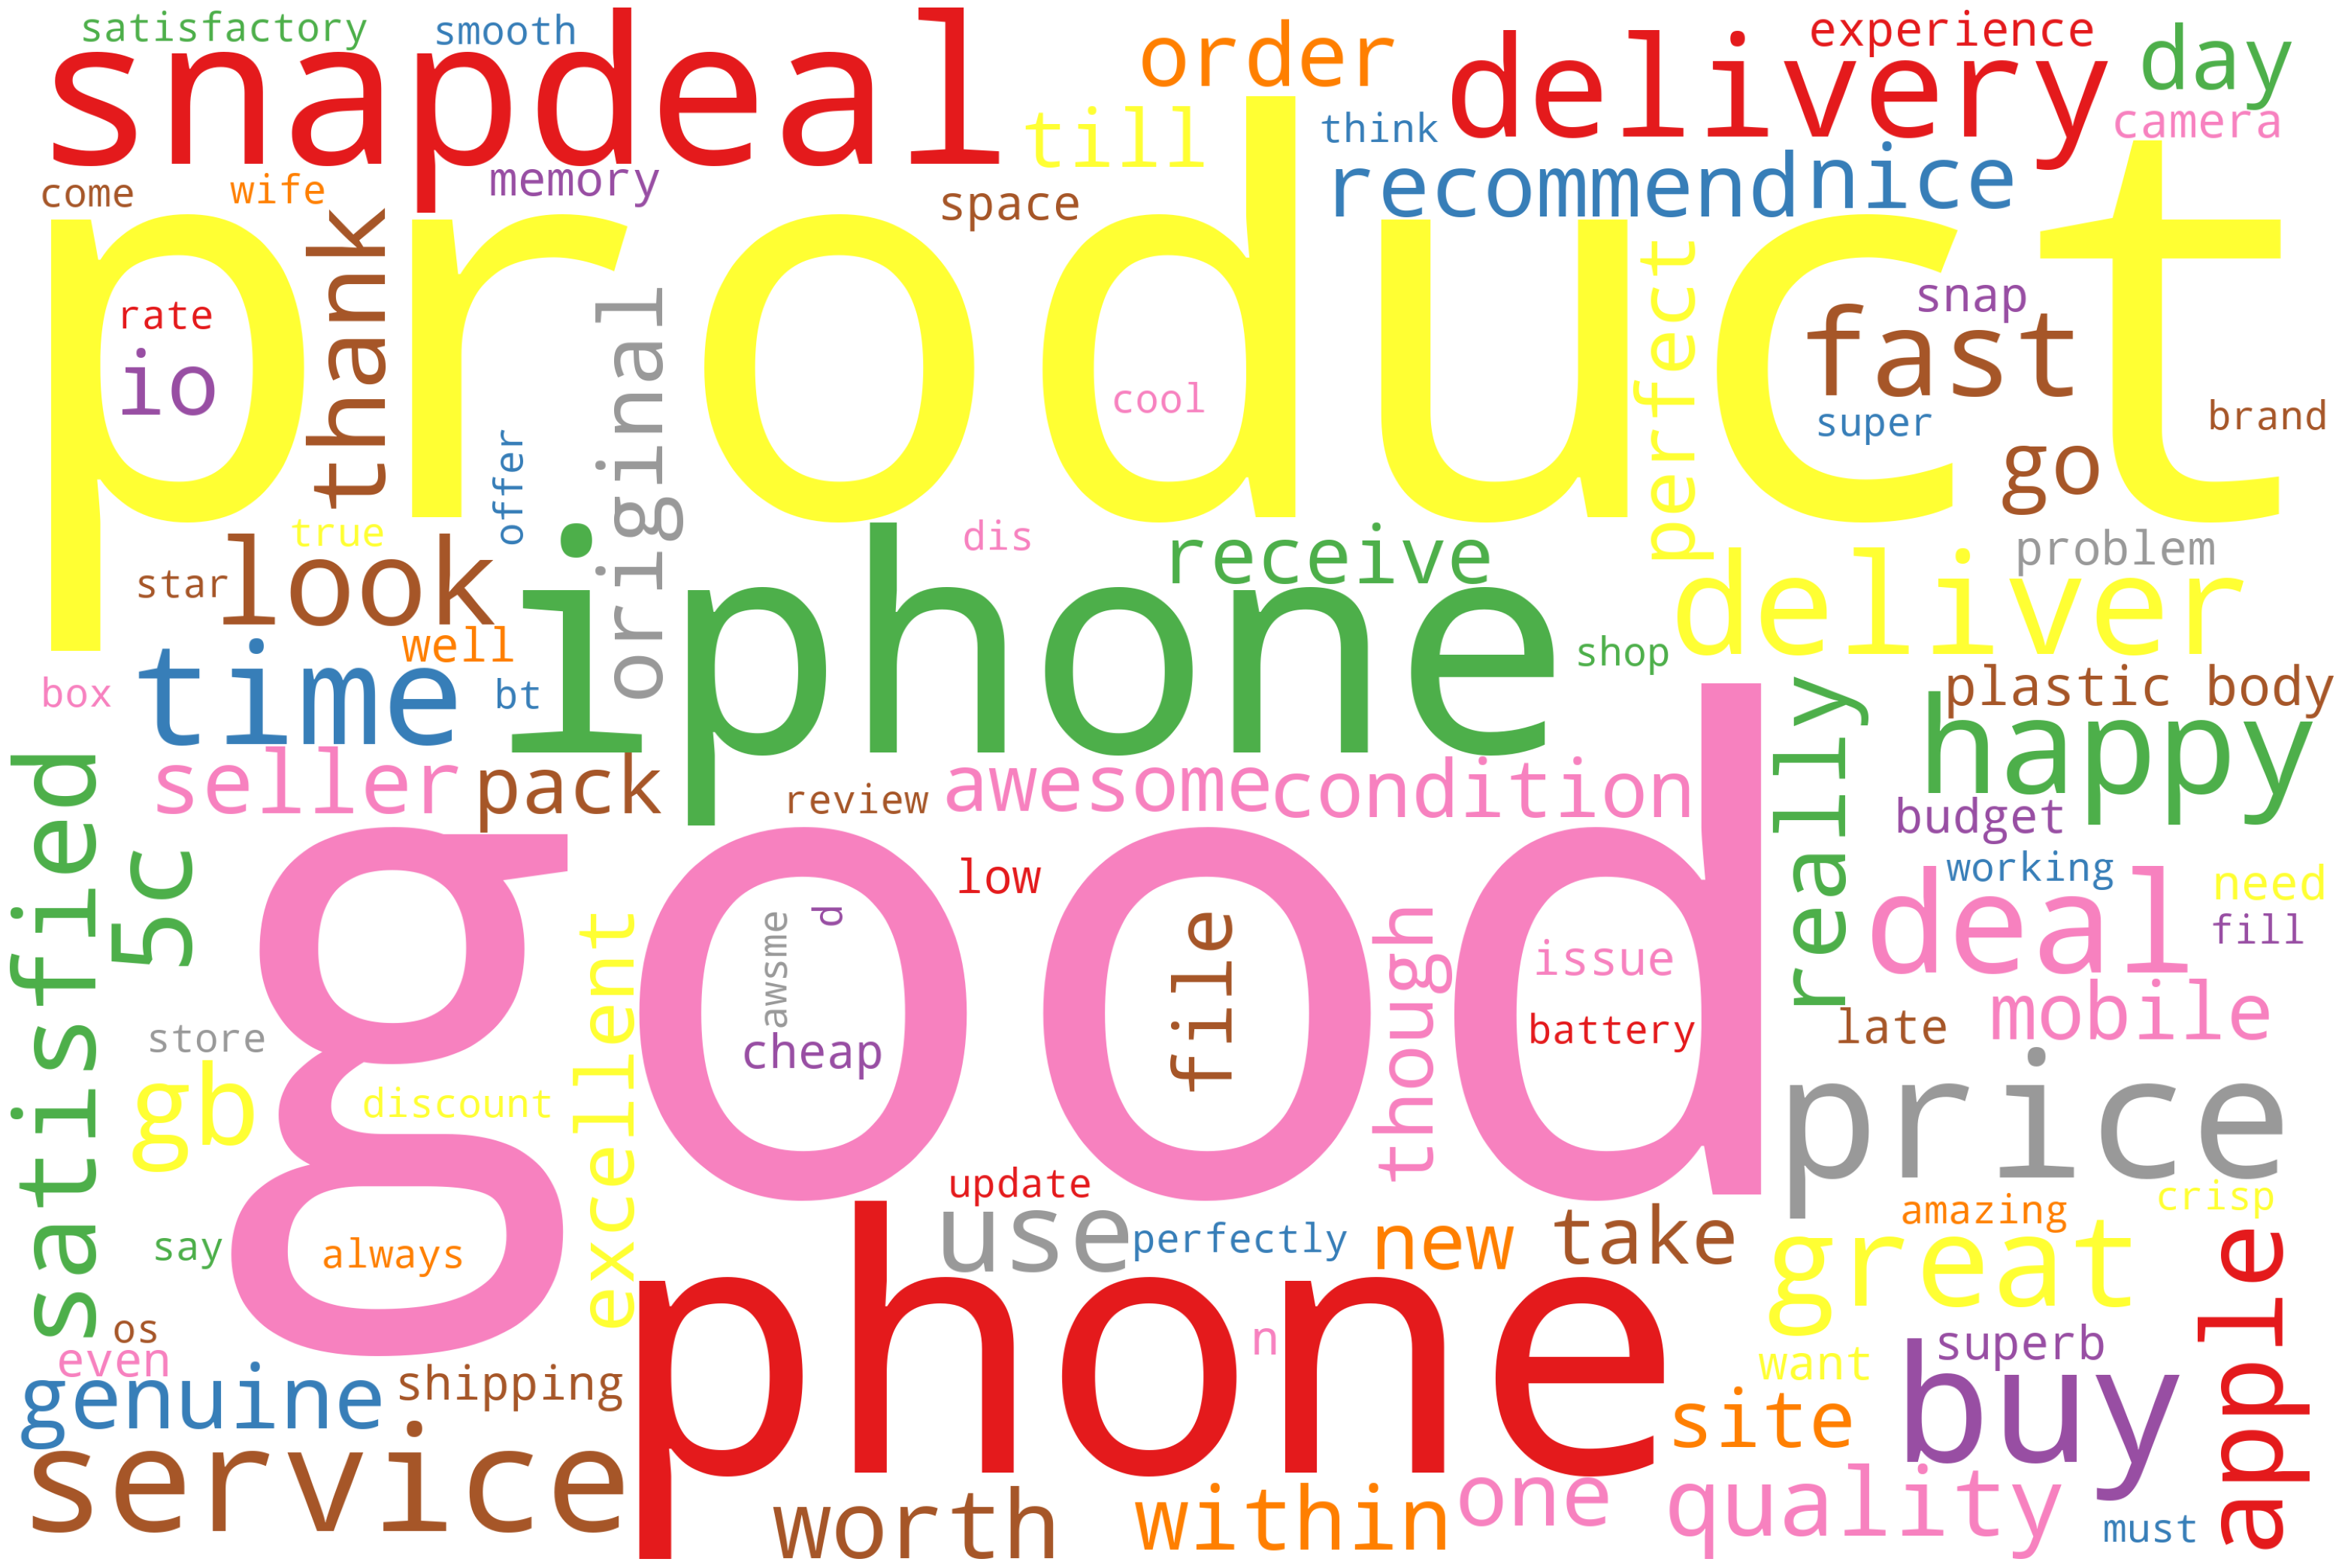

In [58]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 3000, height= 2000, background_color= 'white', max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

## Name Entity Recognition

In [59]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block= clean_comments
doc_block= nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [60]:
for token in doc_block[100:200]:
    print(token,token.pos_)

great ADJ
discount NOUN
phone NOUN
worth ADJ
wife NOUN
want VERB
try VERB
iphone PROPN
love VERB
awesome ADJ
mobile ADJ
working NOUN
smooth NOUN
like ADP
apple NOUN
iphone PROPN
hahahaha NOUN
cool VERB
a DET
mush NOUN
deal NOUN
this DET
great ADJ
experience NOUN
iphone NOUN
snapdeal ADJ
delivery NOUN
expectation NOUN
happy ADJ
iphone NOUN
order NOUN
phone NOUN
little ADJ
doubt NOUN
but CCONJ
receive VERB
phone NOUN
really ADV
happyalso ADV
find VERB
original ADJ
iphoneearlier ADV
doubted ADJ
good ADJ
price NOUN
great ADJ
seller NOUN
genuine ADJ
product NOUN
fast ADJ
shipping NOUN
recommend VERB
awsme ADJ
delivry NOUN
time NOUN
product NOUN
recievd VERB
good ADJ
condition NOUN
think VERB
awsme PROPN
site NOUN
shop NOUN
excellent ADJ
product NOUN
can AUX
recommend VERB
friend NOUN
family NOUN
member NOUN
service NOUN
quality NOUN
good ADJ
level NOUN
interaction NOUN
good ADJ
totaly PROPN
satisfy NOUN
product NOUN
it PRON
brand NOUN
new ADJ
100 NUM
genuine ADJ
iphone NOUN
and CCONJ
get VE

In [61]:
# Filtering the nouns and verbs only
nouns_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['pack', 'superb', 'priority', 'phone', 'price', 'category', 'manufacturer', 'warranty', 'accessory', 'd', 'phone', 'good', 'd', 'phone', 'look', 'plastic', 'body', 'metal', 'body', 'look', 'mean', 'body', 'look', 'plastic', 'look', 'camera', 'superb', 'battery', 'dere', 'problem', 'space', 'say', 'phone', 'problem', 'choose', 'gb', 'phone', 'flaw', 'word', 'say', 'phone', 'dis', 'price', 'thumb', 'apple', 'product', 'buy', 'phone', 'delivery', 'snap', 'deal', 'get', 'iphone', 'colour', 'condition', 'rate', 'nsnapdeal', 'rate', 'site', 'store', 'awesum', 'phonegood', 'price', 'product', 'pack', 'issue', 'courier', 'servicethey', 'take', 'day', 'deliver', 'buy', 'iphone', 'deal', 'product', 'update', 'ios', 'deal', 'offer', 'product', 'customer', 'care', 'iphone', 'buy', 'use', 'year', 'performance', 'think', 'go', 'iphone', 'want', 'go', 'iphone', 'decide', 'buy', 'iphone', '5cnnsnapdeal', 'provide', 'deal', 'compare']


In [62]:
# Counting the noun & verb tokens
cv= CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words= X.sum(axis=0)

words_freq= [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns= ['word','count']
# viewing top ten results
wd_df[0:10]

,word,count
0,product,40
1,phone,28
2,iphone,25
3,price,17
4,buy,15
5,service,12
6,delivery,11
7,time,11
8,deliver,11
9,deal,10


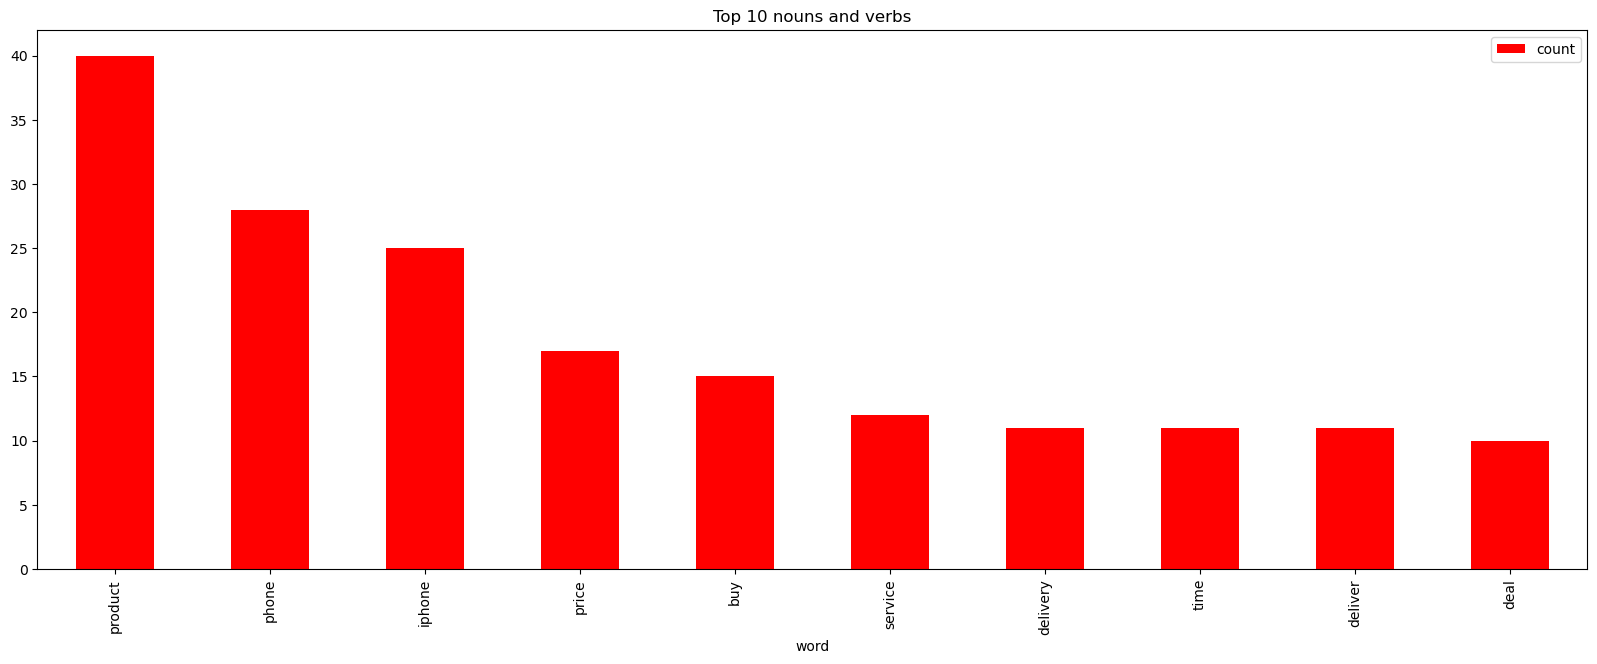

In [63]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='red');


## Emotion Mining Analysis

In [64]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['lovely  fastest super Good Mobile but its memory will be filled faster its just 8GB limit Honestly speaking initially I was hesitated because of previous reviews about snapdeal.',
 'But those all reviews are fake and just to damage the reputation of snapdeal.',
 "I am truely satisfied by snapdeal's service.",
 '100% satisfactory.',
 'Genuine product with honest service.',
 "So don't believe on rumours.",
 'I am going with five stars.',
 'Thanks snapdeal for wonderful shopping experience.',
 'Quality product from snapdeal.',
 'Delivery was on time.',
 'I am very much happy with my product thanks to SNEPDEAL.',
 'Marvallous Phone...Ever used....You must buy The 5C was delivered in a sealed box - crisp and brand new !',
 'super deal.',
 'Good , product is satisfied which I got from Snapdeal Its an awesome phone Great product at such amazing price.',
 'Delivery was fast.',
 'N iPhone is amazing.',
 'Awesome iphone in this price range.',
 'i would recommend this phone dream come true got 

In [65]:
sent_df= pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,lovely fastest super Good Mobile but its memo...
1,But those all reviews are fake and just to dam...
2,I am truely satisfied by snapdeal's service.
3,100% satisfactory.
4,Genuine product with honest service.
...,...
122,Very good service by seller.
123,Faster delivery and proper packing.
124,Have switched from android to apple and i am p...
125,"Excellent camera , crisp display ."


In [66]:
# Emotion Lexicon - Affin
affin=pd.read_csv("Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [67]:
affinity_scores= affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [68]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affinity_scores

def calculate_sentiment(text:str=None):
    sent_score= 0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [69]:
# manual testing
calculate_sentiment(text= 'great')

3

In [70]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      4
1     -6
2      0
3      0
4      2
      ..
122    3
123    0
124    3
125    3
126    1
Name: sentiment_value, Length: 127, dtype: int64

In [71]:
# how many words are there in a sentence?
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      28
1      14
2       7
3       2
4       5
       ..
122     5
123     5
124    15
125     6
126    12
Name: word_count, Length: 127, dtype: int64

In [72]:
sent_df.sort_values(by= 'sentiment_value')

,sentence,sentiment_value,word_count
1,But those all reviews are fake and just to dam...,-6,14
39,Dere is only one problem nd dat is space... Bt...,-4,20
62,Dont buy on fraudulent schemes.,-4,5
104,no lagging till today\nsuitable for your busin...,-3,9
117,Only problem is you need to pay for everything.,-3,9
...,...,...,...
68,I would defination prefer this nxt time also W...,14,47
13,"Good , product is satisfied which I got from S...",16,20
45,Timely delivery by snap deal I got my iPhone 5...,18,57
78,Overall perfect Really happy with the product ...,20,50


In [73]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    127.000000
mean       2.866142
std        4.361378
min       -6.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       20.000000
Name: sentiment_value, dtype: float64

In [74]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,But those all reviews are fake and just to dam...,-6,14
2,I am truely satisfied by snapdeal's service.,0,7
3,100% satisfactory.,0,2
5,So don't believe on rumours.,0,5
6,I am going with five stars.,0,6
8,Quality product from snapdeal.,0,4
9,Delivery was on time.,0,4
11,Marvallous Phone...Ever used....You must buy T...,0,19
14,Delivery was fast.,0,3
19,!,0,1


In [75]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,lovely fastest super Good Mobile but its memo...,4,28
4,Genuine product with honest service.,2,5
7,Thanks snapdeal for wonderful shopping experie...,6,6
10,I am very much happy with my product thanks to...,5,11
12,super deal.,3,2
...,...,...,...
121,Thanks snapdeal !,2,3
122,Very good service by seller.,3,5
124,Have switched from android to apple and i am p...,3,15
125,"Excellent camera , crisp display .",3,6


In [76]:
# Adding index cloumn
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,lovely fastest super Good Mobile but its memo...,4,28,0
1,But those all reviews are fake and just to dam...,-6,14,1
2,I am truely satisfied by snapdeal's service.,0,7,2
3,100% satisfactory.,0,2,3
4,Genuine product with honest service.,2,5,4
...,...,...,...,...
122,Very good service by seller.,3,5,122
123,Faster delivery and proper packing.,0,5,123
124,Have switched from android to apple and i am p...,3,15,124
125,"Excellent camera , crisp display .",3,6,125


C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_21760\3029961482.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'],color="black")


<Axes: xlabel='sentiment_value', ylabel='Density'>

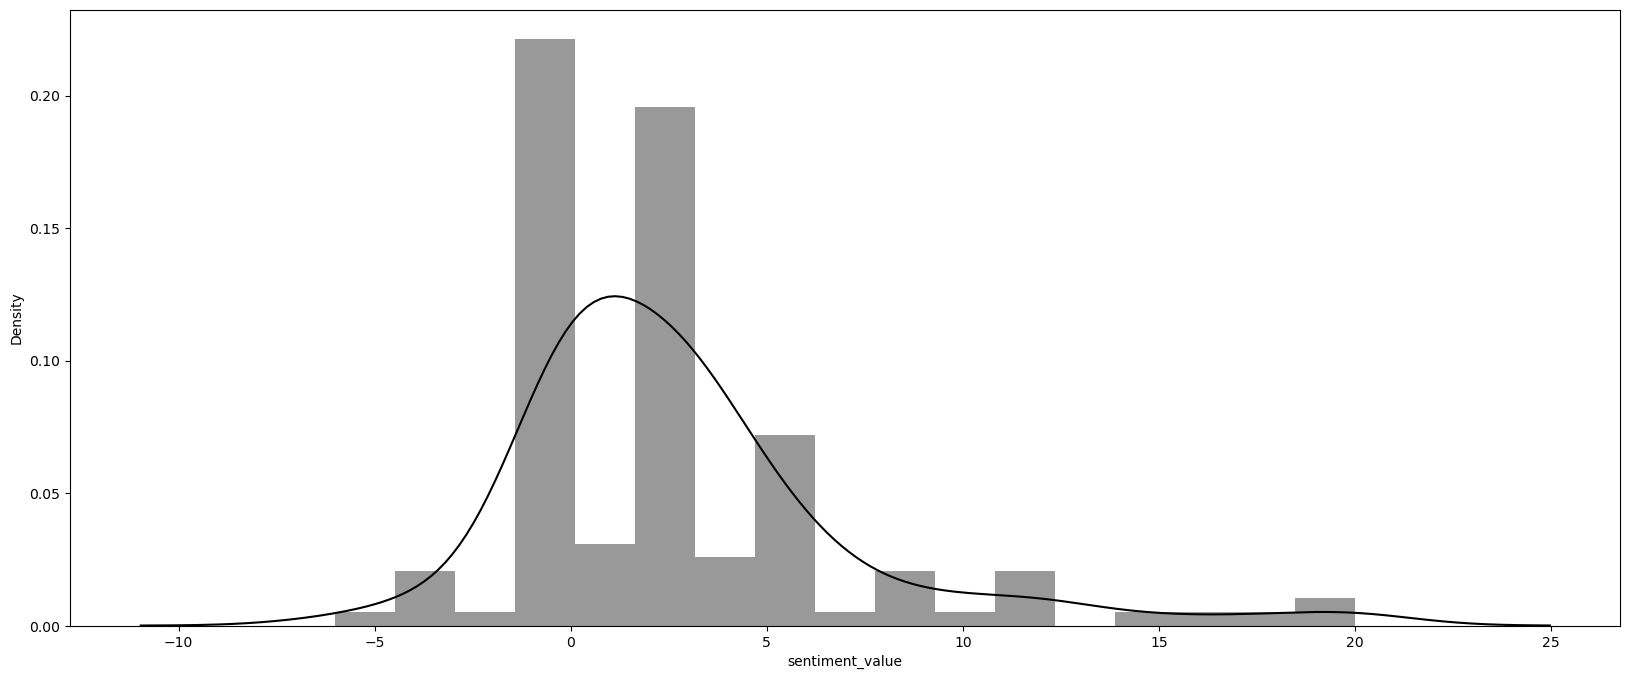

In [77]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize= (20,8))
sns.distplot(sent_df['sentiment_value'],color="black")

<Axes: xlabel='index', ylabel='sentiment_value'>

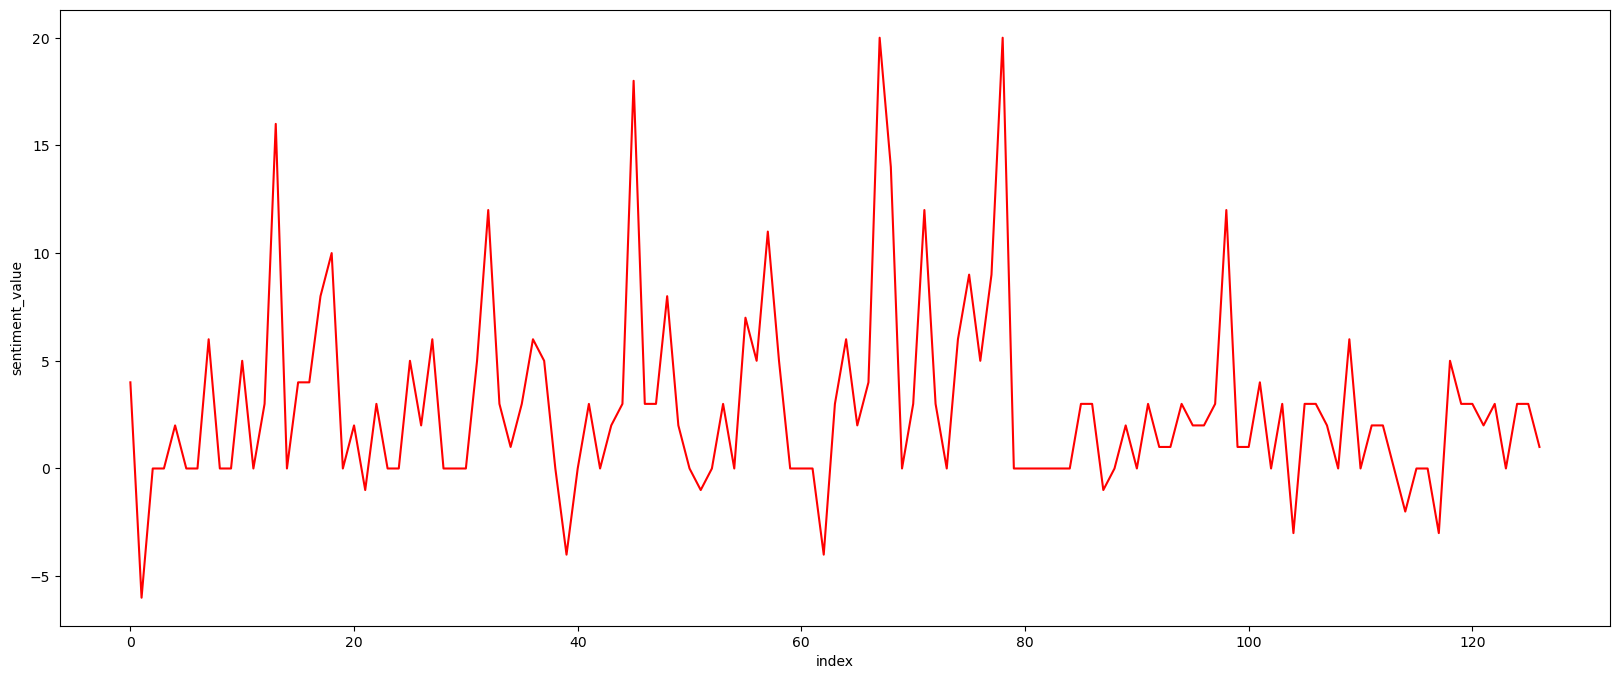

In [78]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize= (20,8))
sns.lineplot(y= 'sentiment_value',x= 'index',data= sent_df,color= 'red')

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

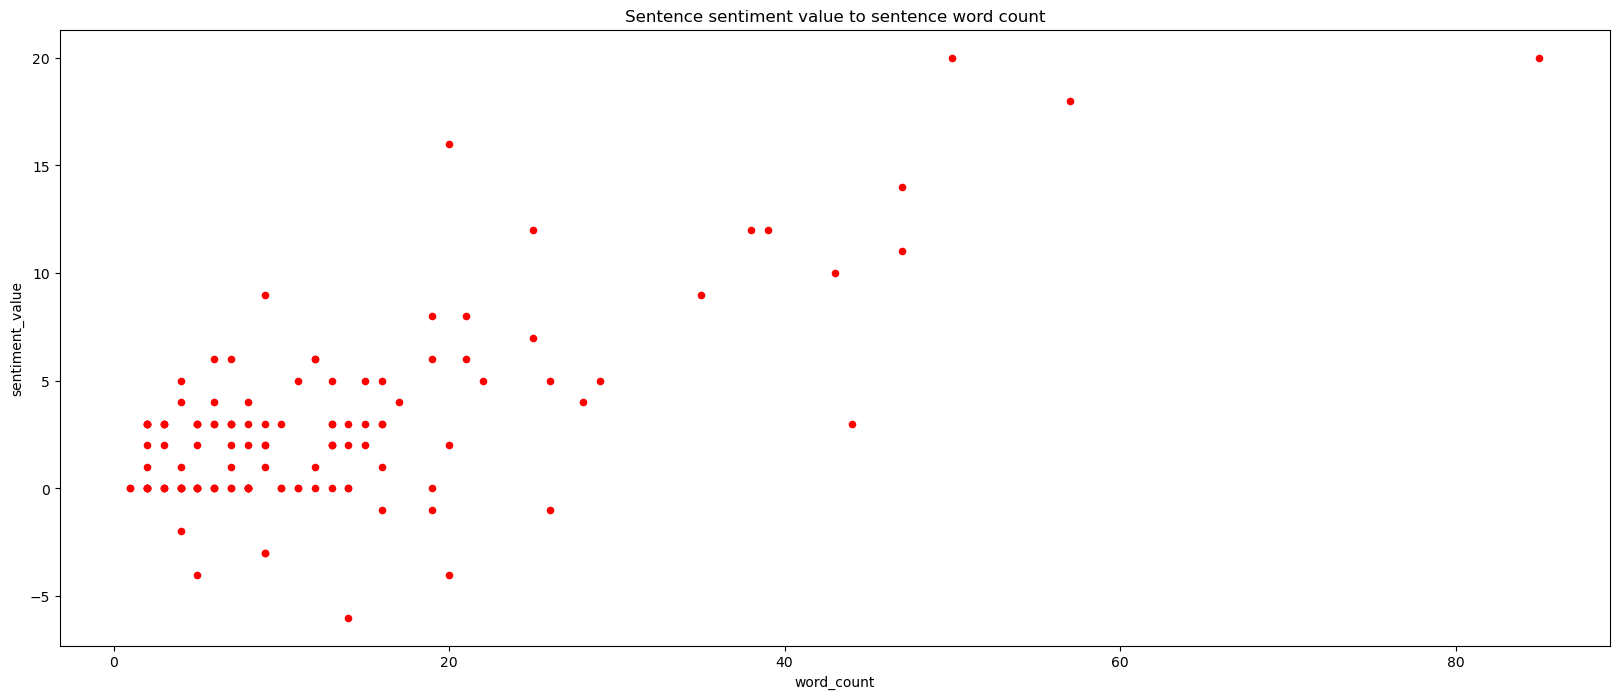

In [79]:
# Correlation analysis
sent_df.plot.scatter(x= 'word_count',y= 'sentiment_value',figsize=(20,8),title= 'Sentence sentiment value to sentence word count',color='red')